In [2]:
# 나만의 git repository(깃 저장소) 만들기!
# 1. Github에 접속한다.
# 2. 로그인하고 접속하면 Repositories에 New 초록색버튼을 누른다.(or Creative Repository)
# 3. Repository Name(중복불가)와 Description(간략설명)을 작성한다.
# 4. 아래쪽의 .gitgnore를 설정해주고 라이센스를 선택한다. 
#    -MIT라이센스 선택
#    회사에서 라이센스 선택 시 회의가 필요함. 내가 라이센스를 선택해야할 시 반드시 팀장에게 보고하고 진행하도록 한다.
#    GNU Gerneral Public License(줄여서 GPL)은 오픈소스 정책이라 5년에서 10년 후에 소스코드를 공개해야 할 수도 있음
#    향후에 그동안 회사에서 벌어들인 수익(억단위)를 회사에 물어내야 하는 일이 발생할 수도 있다.
#    반면 장점은 시장확장성이 있다. 사용자가 많아지면 유료로 전환하여 돈을 벌 수 있다.
# 5. Create Repository를 눌러 저장소를 생성한다.
# 6. 초록색 버튼 Code 단추를 눌러 URL을 복사한다.
# 7. 터미널창에서 저장소의 기본 위치를 선택한다.
#    cd ~(맨위-홈디렉토리-로 이동) cd proj(기존에 생성해놨던 proj폴더로 진입)
# 8. 해당 위치에서 git clone 복사한URL붙여넣기(shift insert or 마우스)
# 9. 작업할 저장소로 위치를 이동한다.cd 저장소이름(위3번의 Repository Name:testRepoBK)
# 10. 해당 위치에서 jupyter note 입력하여 웹브라우저에서 쥬피터 실행 -파이썬 파일 작성 가능해짐
# 11. 터미널창에서 git status 입력하면 현재 추적되지 않는 파일(빨간색)을 볼 수 있다. 
#     그리고 ls -al을 통해 리스트로 확인 가능
#     -github저장소 원본에서 추적되지 않음을 확인한다.
# 12. 해당 파일을 추적하기 위해 git add '추적되지 않은 파일명('제외) 입력
# 13. 다시 터미널창에 git status를 입력하면 추적되었음을 나타내는 초록색으로 변경되고 commit하라는 메세지가 나온다.
# 14.  git config --global user.email "you@example.com" ""안에 내 메일 적고 입력
#      git config --global user.name "Your Name" 등록 시 이름 적고 입력
# 15. git commit -am "커밋내용" 입력
# 16. git push origin master 입력하고 github에서 새로고침하면 확인할 수 있다.


In [21]:
import time
import multiprocessing

# multiprocessing.Process는 프로세스를 만드는데 활용할 수 있다.
class countDown(multiprocessing.Process):
    # 프로세스를 생성한다.
    def __init__(self, x):
        # 생성자 쪽에서 multiprocessing.Process의 생성자를 호출해서 실제 구동 가능한 프로세스를 만들었다.
        # 해당 프로세스는 x값을 입력으로 들어온 값을 설정한다.
        multiprocessing.Process.__init__(self)
        self.x = x
        
    #실제 프로세스가 run()을 사용하면 구동하는 함수    
    def run(self):
        while True:
            if self.x == 0:
                break
            
            print("count Down ... %d" % self.x)
            self.x -= 1
            # sleep(초단위 시간)을 통해서 대기
            time.sleep(1)

p = countDown(5)
p.start()

# 프로세스보기 터미널창 ps -ef
# 터미널창에서 두번째칸이 PID(프로세스아이디), 세번째칸이 PPID(부모Parents프로세스아이디)
# 작업중인 프로세스 강제종료 kill -9 7627(PID, 두번쨰칸)하면 쥬피터 카운트가 멈춤을 확인할 수 있다.
# 다시 ps -ef 하면 프로그램이 구동되는 도중에는 없던 <defunct>표시가 프로그램이 구동 완료된 후에는 나오는 것을 볼 수 있다.
# 리눅스에서 프로세스를 관리할 때 자식 프로세스가 죽으면 부모프로세스 자식프로세스의 시신을 회수해 가야 한다.
# 그러나 부모프로세스도 죽었다면 좀비프로세스가 되어서 init(최상위 조상)프로세스가 정화를 해줄 때까지 defunct(현존하지 않는)상태에 놓이게 된다.
# 적당한 시간이 지나면 init프로세스가 죽은 프로세스를 정리한다.
# 정리하고 난 이후에 다시 ps -ef 명령을 보면 기존에 있던 프로세스아이디(PID)가 사라진 것을 확인할 수있다.

count Down ... 5
count Down ... 4
count Down ... 3
count Down ... 2
count Down ... 1


In [15]:
# 멀티프로세스란? 여러개의 프로세스를 동시다발적으로 작업을 하는 과정
# 프로세스함수는 메세지를 출력하고 일정한 시간 간격으로 동작을 하도록 서포트한다.
import time
import multiprocessing

def process(message, interval):
    while True:
        print("I'm working ...: %s" % message)
        time.sleep(interval)

# 람다란? 매서드를 객체화한 것
# p1이라는 프로세스를 만들어 위의 def process함수의 일을 시킬 것이다.
# 그리고 파라미터(입력)로는 args = ("p1", 1)을 전달할 것이다.
p1 = multiprocessing.Process(target = process, args = ("p1", 1, ))
# 프로세스는 p2인데 작업은 3초마다
p2 = multiprocessing.Process(target = process, args = ("p2", 3, ))
# 프로세스는 p3인데 작업은 5초마다
p3 = multiprocessing.Process(target = process, args = ("p3", 5, ))
# 프로세스는 p4인데 작업은 2초마다
p4 = multiprocessing.Process(target = process, args = ("p4", 2, ))

p1.start()
p2.start()
p3.start()
p4.start()

cnt = 0
while cnt < 100:
    cnt +=1
    # 메인스레드(부모프로세스)
    # 프로세스를 생성할 때는 부모프로세스가 자식프로세스를 관리하게 된다.
    # ps -ef 명령으로 볼 때 자식프로세스는 모두 공동으로 부모프로세스를 갖는다.
    # 자신의 프로세스는 아이디는 PID. 부모의 프로세스 아이디는 PPID
    print("Main Tread ...")
    time.sleep(1)
    
# ps -ef로  프로세스 리스트를 확인할 수 있고
# 확인된 프로세스들 중 강제종료하고 싶으면 kill -9 PID숫자 -> defunct(현존하지 않는)

I'm working ...: p1
I'm working ...: p2
I'm working ...: p3
I'm working ...: p4
Main Tread ...
I'm working ...: p1
Main Tread ...
I'm working ...: p1
I'm working ...: p4
Main Tread ...
I'm working ...: p2
I'm working ...: p1
Main Tread ...
I'm working ...: p1
I'm working ...: p4
Main Tread ...
I'm working ...: p3
I'm working ...: p1
Main Tread ...
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
Main Tread ...
I'm working ...: p1
Main Tread ...
I'm working ...: p4
I'm working ...: p1
Main Tread ...
I'm working ...: p2
I'm working ...: p1
Main Tread ...
I'm working ...: p3
I'm working ...: p4
I'm working ...: p1
Main Tread ...
I'm working ...: p1
Main Tread ...
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
Main Tread ...
I'm working ...: p1
Main Tread ...
I'm working ...: p4
I'm working ...: p1
Main Tread ...
I'm working ...: p3
I'm working ...: p2
I'm working ...: p1
Main Tread ...
I'm working ...: p4
I'm working ...: p1
Main Tread ...
I'm working ...: p1
Main 

I'm working ...: p1
I'm working ...: p3
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p3
I'm working ...: p4
I'm working ...: p1
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p3
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p3
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p3
I'm working ...: p1
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1


I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p2
I'm working ...: p1
I'm working ...: p3
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p3
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p3
I'm working ...: p4
I'm working ...: p1
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p2
I'm working ...: p4
I'm working ...: p1
I'm working ...: p3
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p2
I'm working ...: p1
I'm working ...: p4
I'm working ...: p1
I'm working ...: p1
I'm working ...: p3
I'm working ...: p2


Process Process-17:
Process Process-19:
Process Process-16:
Process Process-18:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "<ipython-input-15-1300bd50170c>", line 8, in process
    time.sleep(interval)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py

In [50]:
import time
from multiprocessing import Pool

def f(x):
    return x * x

# 프로셋들의 집합장소인 풀을 만들어서 4개를 수용할 수 있도록 만든다.
pool = Pool(processes = 4)

# 이 때 작업 전체는 비동기 처리가 이루어진다.
# pool.apply_async()가 비동기 처리 작업을 지원한다.
# 숫자 10을 제곱하는 용도
# map(f, 10)
# 프로세스에 작업처리를 전달할 경우 데이터 2개를 넣을 경우 그 2개를 표시해주고 , 표시하고 괄호를 닫아야 한다.
# ex) pool.abce(10, 20, )
# -괄호()는 파이썬에서 다양하게 사용되기 때문에 주의 필요. 튜플의 요소가 1개인 경우 정수로 인식하므로 ,활용
res = pool.apply_async(f, (10, ))
# 1초 안에 처리하지 못하면 에러.
# 처리를 한다면 결과를 출력한다.
print(res.get(timeout = 1))

# 위의 def f라는 기능을 10번 작업하도록 한다도
# range(10)은 데이터의 개수가 10개이므로 비동기 처리의 의미가 있다.
print(pool.map(f, range(10)))

# pool.imap의 경우에는 출력하지않고 iteration(반복) 가능한 객체를 만든다.
it = pool.imap(f, range(10))
# it.nest()통해서 만든 첫 번째 결과
print(it.next())
# 두 번째 결과
print(it.next())
# 세 번째 결과
print(it.next(timeout = 2))
      
# 10초간 슬립하고 하는일이 없으므로 None이 나온다.
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 60))
print("pass")
# 10초간 슬립을 하는데 대기시간은 3초이므로 에러가 발생
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 3))
      
# 딥러닝은 처리시간이 오래걸림. 실시간 처리를 한다고 했을 때 처리가 안되면 중단시키기 위해 타임아웃

100
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
4
None
pass


TimeoutError: 

Process ForkPoolWorker-13853:
Process ForkPoolWorker-13851:
Process ForkPoolWorker-13852:
Process ForkPoolWorker-13850:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/an

In [38]:
import multiprocessing as mp

def withdraw(money):
    for _ in range(20000):
        money.value -= 1
    
def deposit(money):
    for _ in range(20000):
        money.value += 1
        
def perform_process():
    # money변수는 크리티컬섹션(전역변수를 공통적으로 공유하고 있는 상태, 동시다발적으로 접근가능한 영역)이 되었다.
    # 프로세스 간에는 원래 데이터를 공유할 수 없다.
    # 그러다보니 IPC라는 것을 내부적으로 사용하여 프로세스간에 정보를 공유할 수 있도록 해준다.
    # 이 작업을 mp.Value()가 해준다.
    money = mp.Value('i', 20000)
    
    p1 = mp.Process(target = withdraw, args = (money, ))
    p2 = mp.Process(target = deposit, args = (money, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 23932
Final Money = 18178
Final Money = 18118
Final Money = 26814
Final Money = 17926
Final Money = 21482
Final Money = 18216
Final Money = 18409
Final Money = 21539
Final Money = 21860


In [55]:
import multiprocessing as mp

# p1프로세스의 작업 - 0.0000001-3
def withdraw(money, lock):
    for _ in range(20000):
        lock.acquire()
        money.value -= 1
        lock.release()

# p2프로세스의 작업 - 0.0000007
def deposit(money, lock):
    for _ in range(20000):
        # 크리티컬 섹션에 자물쇠를 채운다. lock.acquire()
        # 프로세스제어권이 넘어가 다른녀석이 접근하려하면 이를 막는다. 락이 풀릴때까지 lock.release()
        lock.acquire()
        money.value += 1
        lock.release()
        
def perform_process():
    # money는 크리티컬섹션이 되었다.
    # 프로세스간의 정보 공것 위한 것
    money = mp.Value('i', 20000)
    # 크리티컬 섹션을 보호해주기 위해 락을 반드시 사용할 것. 크리티컬섹션의 보호 == 데이터의 안정성. 무결성
    # 락을 남발하면 성능을 저하시킬 수 있으므로 주의.
    lock = mp.Lock()
    
    p1 = mp.Process(target = withdraw, args = (money, ))
    p2 = mp.Process(target = deposit, args = (money, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Process Process-13854:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-13855:
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13857:
Traceback (most recent call last):
Process Process-13856:
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: deposit() missing 1 required positional argument: 'lock'
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13858:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'
Process Process-13859:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13860:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-13861:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13862:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'
Process Process-13863:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13864:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-13865:
TypeError: withdraw() missing 1 required positional argument: 'lock'
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13866:
Traceback (most recent call last):
Process Process-13867:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13868:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-13869:
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13870:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-13871:
TypeError: withdraw() missing 1 required positional argument: 'lock'
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


Process Process-13872:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-13873:
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: withdraw() missing 1 required positional argument: 'lock'
TypeError: deposit() missing 1 required positional argument: 'lock'


Final Money = 20000


In [ ]:
# 크리티컬 섹션 보호 위한 Spinlock vs Semaphore
# Spinlock은 While루프를 돌면서 폴링(polling)함
# 락이 걸린 경우 자신에게 주어진 시간동안 풀로대기
# 단순연산에 사용.
# 락이 걸린 동안 다른 작업들 다 줄서서 대기하기 때문에 복잡연산의 경우 오래걸린다.
# Semaphore 비동기처리랑 묶는 편
# 락이 걸린 경우 무관한 다른 작업을 하러 감 = 제어권을 넘김 = 제어권이 넘어갈때 무조건 컨택스트 스위칭이 발생함
# 비동기처리: 카톡. 일단 보냄
# 동기처리: 전화. 사용자가 수신하기 전까지는 데이터가 왔다갔다 안됨.무작정 대기
# 복잡연산에 사용. 
# 연산이 복잡할 경우 락으로 대기하는 시간보다 컨택스트 스위칭(복사하고 제어권넘김)이 빠르다.
# context swiching의 문제가 있다. 레지스터 전체를 스택에 복사
# 1. HW Context
# 2. Memory Context , 3. Process Context 신경X

In [54]:
import time
import threading

# threading.Thread를 상속받아 DummyThread를 기본적인 Thread 구조로 만들었다.
# 여기서는 run만 구현해주면 바로 스레드를 활용할 수 있게 된다.
# run에는 스레드가 작업할 내용을 작성해주면 된다.
class DummyThread(threading.Thread):
    def run(self):
        now = time.ctime()
        # self.ident는 Thread 자체의 ID값을 나타낸다.
        print(
            "[time:%s][tid:%d] Thread!\n" % (now, self.ident)
        )
        time.sleep(30)

# 스레드 전체를 총괄하는 Main Thread가 있고
# Main Thread(Process)의 통제를 받는 12개의 별도 Thread가 존재하는 것
# 그래서 ps -eLf로 살펴봤을 때 Main Thread에 해당하는 녀석 1개와 
# 직접 range를 주고 받는 Thread12개가 잡혀서 총 13개의 스레드가 잡히는 것을 확인할 수 있다.  
for _ in range(12):
    t = DummyThread()
    t.start()
        
# ps -eLf
# PID구간이 스레드 아이디

# Thread는 Process와 다른점이 하나 있다.
# Thread는 기본적으로 Data영역을 공유한다.
# Process는 기본적으로 Data영역이 분리되어 있음

[time:Thu Jul  2 15:00:01 2020][tid:139969444157184] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969452549888] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969981028096] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969477728000] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969989420800] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969494513408] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969486120704] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969469335296] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139969460942592] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139968890533632] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139968882140928] Thread!

[time:Thu Jul  2 15:00:01 2020][tid:139968873748224] Thread!



In [65]:
import threading

# 전역변수는 Data영역에 배치된다.
# process는 data영역을 공유하지 않기 때문에 위에서 IPC인 mp.Value()로 공유함. 비용이발생함
x = 0

def increment_global():
    # global 전역변수화 시킴
    global x
    x += 1
        
def taskOfThread():
    for _ in range(500000):
        increment_global()
        
def thread_main():
    global x
    x = 0
    
    # 두 개의 스레드를 만들었다.
    # 두 개의 스레드는 taskOfThread를 구동시킨다.
    t1 = threading.Thread(target = taskOfThread)
    t2 = threading.Thread(target = taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

# Thread가 전역변수 (Data영역)의 내용을 별도의 작업 없이도 공유할 수 있음을 확인할 수 있다.
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 787325 after Iteration 0
x = 1000000 after Iteration 1
x = 877007 after Iteration 2
x = 937318 after Iteration 3
x = 1000000 after Iteration 4
x = 820384 after Iteration 5
x = 881001 after Iteration 6
x = 633317 after Iteration 7
x = 881051 after Iteration 8
x = 815732 after Iteration 9


In [64]:
import threading

# Threading 라이브러리의 Lock을 사용하는 것이 Thread를 다룰 때 더 빠르다.
lock = threading.Lock()
x = 0

def increment_global():
    global x
    x += 1
        
def taskOfThread():
    for _ in range(500000):
        lock.acquire()
        increment_global()
        lock.release()
        
def thread_main():
    global x
    x = 0
    
    t1 = threading.Thread(target = taskOfThread)
    t2 = threading.Thread(target = taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

# Thread가 전역변수 (Data영역)의 내용을 별도의 작업 없이도 공유할 수 있음을 확인할 수 있다.
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 1000000 after Iteration 0
x = 1000000 after Iteration 1
x = 1000000 after Iteration 2
x = 1000000 after Iteration 3
x = 1000000 after Iteration 4
x = 1000000 after Iteration 5
x = 1000000 after Iteration 6
x = 1000000 after Iteration 7
x = 1000000 after Iteration 8
x = 1000000 after Iteration 9


In [66]:
def square2(x):
    return x * x

myList = [1, 2, 3, 4, 5]
res = []

for num in myList:
    res.append(square(num))

In [67]:
import os
import multiprocessing

def square(n):
    print("Worker Process is for {0}: {1}".format(n, os.getpid()))
    return n * n

p = multiprocessing.Pool()
re = p.map(square, myList)

print(res)

Worker Process is for 2: 12810
Worker Process is for 3: 12811
Worker Process is for 4: 12812
Worker Process is for 5: 12813
Worker Process is for 1: 12809
[1, 4, 9, 16, 25]


Process ForkPoolWorker-13880:
Process ForkPoolWorker-13881:
Process ForkPoolWorker-13877:
Process ForkPoolWorker-13879:
Process ForkPoolWorker-13874:
Process ForkPoolWorker-13875:
Process ForkPoolWorker-13878:
Process ForkPoolWorker-13876:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Tr

In [10]:
import threading
import time
import logging

logging.basicConfig(level = logging.DEBUG,
                   format='(%(threadName)-9s) % (message)s',)

class ThreadPool(object):
    def __init__(self):
        super(ThreadPool, self).__init__()
        self.active = []
        self.lock = threading.Lock()
        
    def makeActive(self, name):
        with self.lock:
            self.active.append(name)
            
            time.sleep(5)
            logging.debug('Running: %s', self.active)
            
    def makeInactive(self, name):
        with self.lock:
            self.active.remove(name)
            logging.debug('Running: %s', self.active)
        
def f(s, pool):
    logging.debug('Wating to join the pool')
    with s:
        name = threading.currentThread().getName()
        pool.makeActive(name)
        time.sleep(1)
        pool.makeInactive(name)
            
pool = ThreadPool()
s = threading.Semaphore(3)
for i in range(10):
    t = threading.Thread(target = f, name = 'thread_' + str(i), args = (s, pool))
    t.start()

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

--- Logging error ---
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "/home/bitai/anaconda3/lib/python3.7/logging/__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: unsupported format character 't' (0x74) at index 2
Call stack:
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/home/bitai/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/t

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sampleData1 = np.array([[166, 58.7], [176.0, 75.7], [171.0, 62.1],[173.0, 70.4],[169.0, 60.1]])
# 위의 방식으로 행렬을 만들 수 있다.
print(sampleData1)
# 행렬 변수의 shape를 출력하면 행렬의 차원을 얻을 수 있다.
print(sampleData1.shape)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]
(5, 2)


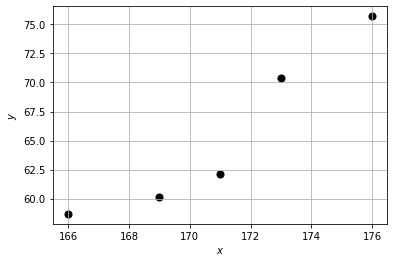

In [5]:
for point in sampleData1:
    plt.scatter(point[0], point[1], c='k', s=50)
    
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [7]:
# 0 ~ 9
value = np.arange(10)
# 5 ~ 14
value2 = np.arange(5, 15)
# 1 ~ 99 까진데 차이가 2씩
value3 = np.arange(1, 100, 2)

print(value)
print(value2)
print(value3)

[0 1 2 3 4 5 6 7 8 9]
[ 5  6  7  8  9 10 11 12 13 14]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [21]:
import numpy as np

dx = 0.00000001

# y = x^2
def integralRange(start, end):
    curX = np.arange(start, end, dx)
    Y = curX ** 2
    print(Y)
    eachBlock = dx * Y
    print(eachBlock)
    area = np.sum(eachBlock)
    return area

print("y = x^2에 대한 0~3까지의 정적분 결과는 = ", integralRange(0, 3))

[0.00000000e+00 1.00000000e-16 4.00000000e-16 ... 8.99999982e+00
 8.99999988e+00 8.99999994e+00]
[0.00000000e+00 1.00000000e-24 4.00000000e-24 ... 8.99999982e-08
 8.99999988e-08 8.99999994e-08]
y = x^2에 대한 0~3까지의 정적분 결과는 =  8.999999954999995


In [25]:
import os
import numpy as np
import multiprocessing

dx = 0.0000001

def calc(x):
    return dx * (x ** 2)

def integralRange(start, end):
    curX = np.arange(start, end, dx)
    
    p = multiprocessing.Pool()
    res = p.map(calc, curX)
    area = np.sum(res)
    return area

print("x^2의 0 ~ 3까지의 정적분 = ", integralRange(0,3))

x^2의 0 ~ 3까지의 정적분 =  8.999999550000005
